<a href="https://colab.research.google.com/github/atulvats/EvoRouteX/blob/main/RouteGenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


gen	nevals	avg    	min    
0  	300   	622.612	10.0653
1  	213   	600.121	12.2735
2  	243   	599.691	15.067 
3  	232   	589.591	6.05139
4  	233   	587.848	13.3472
5  	218   	579.985	9.79064
6  	213   	579.726	9.96253
7  	233   	575.135	8.30724
8  	219   	568.526	13.9532
9  	209   	557.625	11.1776
10 	224   	558.057	15.47  
11 	230   	561.594	10.4392
12 	230   	558.098	18.2403
13 	217   	559.397	11.1607
14 	231   	556.772	11.4824
15 	250   	554.684	10.7103
16 	238   	556.752	10.7103
17 	236   	542.757	9.3991 
18 	225   	521.432	12.329 
19 	225   	508.181	9.43588
20 	209   	488.077	19.9538
21 	232   	477.284	17.9794
22 	237   	467.621	7.39112
23 	217   	461.69 	21.8699
24 	227   	455.983	18.8238
25 	246   	449.923	20.4233
26 	233   	442.613	23.4007
27 	219   	434.645	26.1366
28 	229   	428.097	23.8926
29 	223   	424.139	14.144 
30 	238   	421.931	29.1208
31 	225   	416.945	29.241 
32 	221   	410.881	28.8164
33 	243   	404.245	17.6645
34 	232   	395.51 	31.0753
35 	244   	390.249	36.0764
3

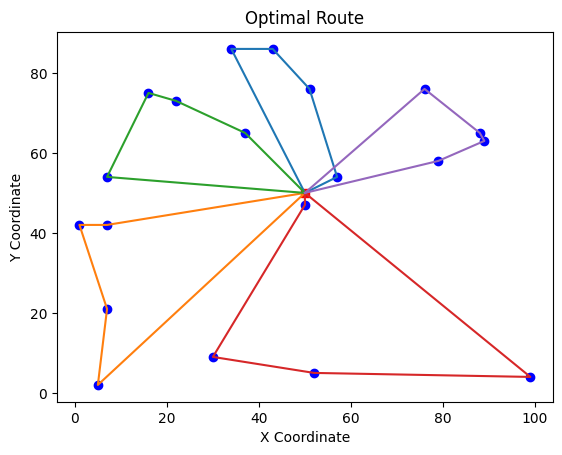

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# We have taken data below just for visualization where depot is the central point
# Here we are defining the number of locations and vehicles
num_locations = 20  # We define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # This function generates random (x, y) coordinates for each location
depot = (50, 50)  # Here we define the central depot location as a fixed point
num_vehicles = 5  # Here we define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # we define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Here we define individual structure. Individuals are lists with a fitness attribute.

# Finishing setting up the individuals and population
# toolbox is an object used to store and manage various evolutionary algorithm components
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Here we calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Here we are using standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Registering the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Registering the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Registering the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Registering the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Let us plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Drawing routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generating initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Seting up statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Running the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plotting the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

# Atul Vats